# Assignment 7: Neural Networks using Keras and Tensorflow -- Group 85
**Authors: Niclas Lindmark, Noa Sjöstrand, Anton Johansson**
**Date: 8/2 -23**

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
pip install tensorflow

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.0
    Uninstalling MarkupSafe-2.0.0:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: 'REQUESTED'


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt


from keras import regularizers 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10 # number of times model is trained with all training data

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [8]:
x_train = x_train.astype('float32') # changing type to float
x_test = x_test.astype('float32') # chainging type to float

x_train /= 255 # normalizing the training data from 0-255 to 0-1
x_test /= 255 # normalizing the testing data from 0-255 to 0-1

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


In [9]:

## Original model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4751 - accuracy: 0.8628 - val_loss: 0.2679 - val_accuracy: 0.9202
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.9316 - val_loss: 0.2070 - val_accuracy: 0.9391
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1778 - accuracy: 0.9486 - val_loss: 0.1573 - val_accuracy: 0.9531
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1456 - accuracy: 0.9579 - val_loss: 0.1355 - val_accuracy: 0.9586
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1220 - accuracy: 0.9641 - val_loss: 0.1239 - val_accuracy: 0.9619
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9686 - val_loss: 0.1126 - val_accuracy: 0.9662
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0933 - accuracy: 0.9732 - val_loss: 0.1112 - val_accuracy: 0.9677
Epoch 

In [10]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 64)                50240     
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## 1. Preprocessing.
In  the  notebook,  the  data  is  downloaded  from  an  external  server  and im-ported into the notebook environment using the mnist.load_data() function call. 
 
1.1. Explain the data pre-processing highlighted in the notebook 
 



Answer: 

Firstly, the data is transformed from integers to float values. This is because the values are going to be multiplied with various weights (between the layers in the neural network) which will be of type float. Changing the type makes it compatible with the model.

Secondly, the data is divided with 255. This is to normalise the pixel values to a range between 0 and 1. Doing this makes it easier for the neural network to recognise patterns and relationships in the provided data. This should result in faster training times and better performance.

Lastly, the label data for both the training and test sets are converted into a binary matrix using the to_categorical function. This is necessary because the training of the neural network require label data to be in a binary format (either the result is a 1 or not a 1). In other words, the label data is transformed from being in a "list" format [1, 2, 2, ..., 5, 2, 9] describing what number where drawn in each sample of the test data, as an integer. to a matrix describing wether the result is a certain number or not. For example, [1, 2, 3] would be transformed to [[0, 1, 0, ...], [0, 0, 1, ...], [0, 0, 0, 1, ...]]. 

There are 2 ways to convert categorical data to numerical data, either integer encoding or one-hot encoding. Integer encoding is where each label is represented by a number, one-hot encoding is thorough a binary matrix like the one in the previous paragraph. In this case we are using one-hot encoding. 

## 2. Network model, training, and changing hyper-parameters 
 
2.1. How  many  layers  does  the  network  in  the  notebook  have?  How  many  neurons  does 
each layer have? What activation functions and why are these appropriate for this ap-
plication? What is the total number of parameters for the network? Why do the input 
and output layers have the dimensions they have? 
 
2.2. What loss function is used to train the network? What is the functional form (a math-
ematical  expression)  of  the  loss  function?  and  how  should  we  interpret  it?  Why  is  it 
appropriate for the problem at hand? 
 
2.3. Train the network for 10 epochs and plot the training and validation accuracy for each 
epoch. 
 
2.4. Update the model to implement a three-layer neural network where the hidden layers 
have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best vali-
dation  accuracy  you  can  achieve?  –  Geoff  Hinton  (a  co-pioneer  of  Deep  learning) 
claimed this network could reach a validation accuracy of 0.9847 
(http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/).  Implement  weight  decay  on  hid-
den units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 
replicates  networks  for  each  regularization  factor.  Plot  the  final  validation  accuracy 
with standard deviation (computed from the replicates) as a function of the regulari-
zation  factor.  How  close  do  you  get  to  Hintons  result?  –  If  you  do  not  get  the  same 
results, what factors may influence this? (hint: What information is not given by Hinton 
on the MNIST database that may influence Model training)  

Epoch 1/40
469/469 [==============================] - 3s 6ms/step - loss: 0.4122 - accuracy: 0.8857 - val_loss: 0.2260 - val_accuracy: 0.9343
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1923 - accuracy: 0.9450 - val_loss: 0.1623 - val_accuracy: 0.9531
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1390 - accuracy: 0.9602 - val_loss: 0.1197 - val_accuracy: 0.9640
Epoch 4/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1100 - accuracy: 0.9687 - val_loss: 0.1026 - val_accuracy: 0.9689
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0897 - accuracy: 0.9747 - val_loss: 0.0912 - val_accuracy: 0.9717
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0746 - accuracy: 0.9788 - val_loss: 0.0882 - val_accuracy: 0.9726
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0639 - accuracy: 0.9823 - val_loss: 0.0805 - val_accuracy: 0.9736
Epoch 

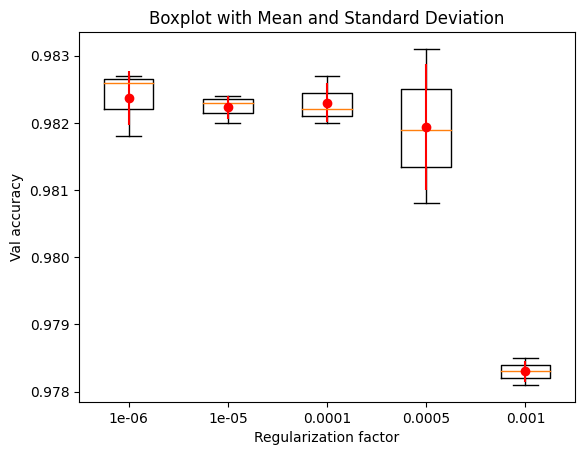

In [5]:
## Our model ##

epochs = 40
reg_factors = [0.000001, 0.00001, 0.0001, 0.0005, 0.001]

# Dictionary to store accuracy scores for each regularization factor
reg_factor_dict = {}

# Loop over each regularization factor and train the model three times for each factor
for reg_factor in reg_factors:
    score_list = []
    for i in range(3):
        # Define the model architecture
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(reg_factor)))
        model.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(reg_factor)))
        model.add(Dense(num_classes, activation='softmax'))

        # Compile the model
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
                      metrics=['accuracy'])

        # Train the model
        fit_info = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
        
        # Evaluate the model on the test set and store the accuracy score
        score = model.evaluate(x_test, y_test, verbose=0)
        score_list.append(score[1])
        print('Regularization factor: {}, Replicate: {}, Test loss: {}, Test accuracy {}'.format(
              reg_factor, i+1, score[0], score[1]))
    
    # Store the accuracy scores for the current regularization factor in the dictionary
    reg_factor_dict[reg_factor] = score_list

# Extract data and organize into lists
data = list(reg_factor_dict.values())
reg = [str(k) for k in reg_factor_dict.keys()]


# Calculate standard deviation and mean for each group
stds = [np.std(d) for d in data]
means = [np.mean(d) for d in data]

# Create boxplot with median, and red errorbar with mean and standard deviation 
fig, ax = plt.subplots()
ax.boxplot(data, labels=reg)
ax.set_xlabel('Regularization factor')
ax.set_ylabel('Val accuracy')
ax.errorbar(np.arange(1, len(reg) + 1), means, yerr=stds, fmt='o', color='red')
ax.set_title('Boxplot with Mean and Standard Deviation')
plt.show()


np.arange() is a function in the NumPy library of Python that is used to create an array of evenly spaced values within a specified interval. np.arange(1, len(labels) + 1) creates an array of indices ranging from 1 to the number of labels in the dictionary plus 1. This array of indices is used as the x-coordinates for the error bars, to ensure that they are centered above each boxplot. yerr=stds sets the height of the error bars to the standard deviation of the data for each label in the dictionary.

Answers: 

 2.1)   There are 3 layers in total.

The first "layer" is flattening the 28x28 matrices to a 1D vector with 784 elements. This is the input layer and doesn't compute anything, thus we don't count it as a layer.

The remaining layers uses activation functions which decides whether you should activate a neuron or not, and if activated the function decides the output of that neuron.

The first and second "real" layers are hidden layers with 64 neurons each using ReLU activation function. ReLu is a common activation function for the hidden layers because it often result in better performance and training. It outputs the maximum of 0 and the input value. One reason why this trains the models faster is because compared to other activation functions it does not activate all neurons in the layer, only the ones with a positive input. 

The third layer has 10 neurons, one for each possible output number (0-9), and uses Softmax activation, transforming input numbers into probabilities of possible outcomes and is generally used in the output layer of a NN. This allows the network to classify based on probability of being one of the classes given. 

![Picture title](image-20230302-173828.png)

We have calculated the total amount of parameters in the following way:

The flatten layer has no trainable parameters.
The first dense layer has 64 * (784 + 1) = 50,240 trainable parameters, where 784 is the number of pixels in the input image (28x28) and 1 is for the bias term. There is only 1 bias term in each layer since the bias term is shared across all neurons in that layer. That means the bias term affects the output of the entire layer.
The second dense layer has 64 * (64 + 1) = 4,160 trainable parameters.
The output dense layer has 10 * (64 + 1) = 650 trainable parameters.
Total number of trainable parameters = 50,240 + 4,160 + 650 = 54,050.

The input layer has dimension 784 because the input images are grayscale with dimensions 28x28. The output layer has dimension 10 because there are 10 possible numbers to output.

 2.2) The used loss function is cross-entropy, as specified in the code. An advantage of cross-entropy is that it can handle multiple classes well, making it suitable for this task where we are trying to classify images into 10 different classes.  

The mathematical formula for cross-entropy is shown below. When we multiply the true label with the predicted probability, we are only keeping the element of the true class in the 1D vector. This is because the true label vector is 1 for the true class and 0 for all other classes, for example [0,0,0,0,1,0,0]. All the other labels are multiplied with 0 and lose their value. That means this calculation takes the log of the predicted probability for the true class and multiplying it by -1.

![Picture title](image-20230302-194014.png)

 2.3) See prints

 2.4) Our best accuracy was 0.983 with regularization factor 0.0005.

To get a background we will explain L2 regularization, also known as weight decay. It is a technique used to prevent overfitting in machine learning models by adding a penalty to the loss function. The penalty encourages the network to learn smaller weight values, and thus improving its generalization ability. A higher regularization factor will make the weights smaller. On the other hand, a lower regularization factor will result in bigger weights. That means that choosing a too-high value can lead to underfitting, while a too-low value can lead to overfitting.

We did not reach the same accuracy rate as Hinton. We were 0.002 accuracy away from his results and there might be several explanations to this that was not stated in the paper. Mainly the batch size was not given by Hinton. Batch size refers to the number of training examples used in one iteration of the algorithm during the training of a neural network, and thus is of great importance. A larger batch size can result in more accurate gradient estimates and faster convergence, but it requires more memory to store the intermediate activations and gradients, and may lead to slower training times. A smaller batch size can lead to noisy gradient estimates and slower convergence, but it requires less memory and may lead to faster training times. 

We used a batch size of 128 and theoretically a higher batch size would have given a better result, closer to what Hinton got. 



## 3. Convolutional layers 
 
3.1. Design a model that makes use of at least one convolutional layer – how performant a 
model can you get? -- According to the MNIST database it should be possible reach to 
99%  accuracy  on  the  validation  data.  If  you  choose  to  use  any  layers  apart  from  the 
convolutional layers and layers that you used in previous questions, you must describe 
what  they  do.  If  you  do not  reach 99%  accuracy,  report  your  best  performance,  and 
explain your attempts and thought process. 
 
3.2. Discuss the differences and potential benefits of using convolutional layers over fully 
connected ones for the application?  


In [4]:
epochs = 40

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 18s 37ms/step - loss: 0.3793 - accuracy: 0.8838 - val_loss: 0.0908 - val_accuracy: 0.9693
Epoch 2/40
469/469 [==============================] - 17s 37ms/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.0751 - val_accuracy: 0.9756
Epoch 3/40
469/469 [==============================] - 17s 36ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 0.0414 - val_accuracy: 0.9873
Epoch 4/40
469/469 [==============================] - 17s 36ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0435 - val_accuracy: 0.9853
Epoch 5/40
469/469 [==============================] - 17s 36ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.0384 - val_accuracy: 0.9868
Epoch 6/40
469/469 [==============================] - 17s 36ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0446 - val_accuracy: 0.9852
Epoch 7/40
469/469 [==============================] - 17s 36ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.0345 - val_accuracy:

Answer:

 3.1) We have used 4 convolutional layer. Firstly we added a Conv2D layer with 32 filters, a kernel size of 3x3, and ReLU activation. This layer applies 32 filters to the input image, each filter extracting a feature. Then we added a MaxPooling2D layer with a pool size of 2x2 and stride of 2. This layer downsamples the feature maps generated by the previous convolutional layer by selecting the maximum value in each 2x2 pool, and the stride= 2 means that it looks at every other pixel. Then we added another Conv2D layer with 64 filters, a kernel size of 5x5, and ReLU activation. This layer applies 64 filters to the feature maps generated by the previous layer and we choose 5x5 and 64 filters because we wanted this layer to extract more features. Lastly we added another MaxPooling2D layer with the same parameters as before.

When first tried with only 2 layers, this resulted in a lower accuracy then we wanted. So we added a second 2D convolutional layer with 3x3 kernel size and a MaxPooling2D layer afterwards, the accuracy was still too low. We then tried to expand the kernel size of the Conv2D layer to sizer 5x5. This resulted in a accuracy of at least 99% which was what we were looking for. 

3.2) A convolutional layer is a set of filters applied to the input image, and are designed to exploit the spatial correlation between adjacent pixels in an image. The filters are merged with the input image, producing a set of feature maps. This is particularly important for image classification tasks where the orientation and location of the object of interest can vary. These feature maps are then passed through a non-linear activation function, such as ReLU, to introduce non-linearity into the model. The filters can help the model focus on certain parts of the image, making it better suited for certain tasks, such as detecting edges, shapes, and textures. 

Fully connected layers, on the other hand, consider the input image as a one-dimensional vector, disregarding its spatial arrangement. By linking each neuron in the present layer to all neurons in the following layer, they require a significant number of parameters. This methodology is not ideal for image recognition, as it cannot preserve the spatial pattern of the image and would necessitate a large number of parameters, and computing power.

The benefits are therefore that the convolutional layers can capture spatial information of an image and is more resource efficient.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed0c436b-4e08-4c3b-a423-80f934892d31' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>